## Here is an example comparing pyDFCSR results with CSRtrack
### CSRtrack starts from t = -0.1 m, while pyDFCSR starts from t = 0 m

In [89]:
%matplotlib widget 
import sys
sys.path.insert(0,'../../')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import h5py
from tools import histogram_cic_2d

In [101]:
datafolder_CSRtrack = r'G:\My Drive\Stanford\research\FEL\CSR\CSRtrack\benchmark_chicane_2024\out'
datafolder_pyDFCSR  =  r'..\output\chicane-2024-05-27T17_06_37-07_00'

## Load CSRtrack Data

In [102]:
data = np.loadtxt(datafolder_CSRtrack + '\chicane_0053.fmt3')
z = data[1:, 4]
delta = data[1:, 5]
Q = data[1:, 6]
x = data[1:, 0]
xp = data[1:, 1]
t = data[0,0]
gam0 = data[0,1]
fz = data[1:, 7]
fx = data[1:, 8]

print("Plotting at z=", t)

x -= np.mean(x)
z -= np.mean(z)
n = z.shape[0]
sig_x = np.std(x)
sig_z = np.std(z)
print('sig_x = ', sig_x )
print('sig_z = ', sig_z)

Plotting at z= 5.7114268152238
sig_x =  0.0018337287304408796
sig_z =  0.00016545456416503947


## Load pyDFCSR data

In [103]:
 
wake_filename = datafolder_pyDFCSR + "-wakes.h5"
step = 'step_57'
with h5py.File(wake_filename, "r") as f:
    print("t =  {}".format(f[step].attrs['position']))
    print("ebeam energy {}".format(f[step].attrs['beam_energy']))
    dE_dct = np.array(f[step]['longitudinal']['dE_dct'])
    unit = f[step]['longitudinal'].attrs['unit']

    x_grids = np.array(f[step]['longitudinal']['x_grids']).reshape(dE_dct.shape)
    z_grids = np.array(f[step]['longitudinal']['z_grids']).reshape(dE_dct.shape)

    xkicks = np.array(f[step]['transverse']['xkicks'])



t =  5.699999999999996
ebeam energy 5000000026.255665


In [104]:
particle_filename = datafolder_pyDFCSR +"-particles.h5"
with h5py.File(particle_filename, "r") as f:
    x2 = np.array(f[step]['particles']['x'])
    xp2 = np.array(f[step]['particles']['xp'])
    y2 = np.array(f[step]['particles']['y'])
    yp2 = np.array(f[step]['particles']['z'])
    z2 = np.array(f[step]['particles']['z'])
    delta2 = np.array(f[step]['particles']['delta'])

In [105]:
particle_filename = datafolder_pyDFCSR +"-statistics.h5"
with h5py.File(particle_filename, "r") as f:
    print(f.keys())
    t2 = np.array(f['step_positions'])
    alphaX2 = np.array(f['alphaX_beam'])
    betaX2 = np.array(f['betaX_beam'])
    gemitX2 = np.array(f['gemitX'])
    sigmaX2 = np.array(f['sigX'])
    sigmaZ2 = np.array(f['sigZ'])

<KeysViewHDF5 ['Cx', 'Cxp', 'R51', 'R52', 'R56', 'alphaX', 'alphaX_beam', 'alphaX_minus_dispersion', 'betaX', 'betaX_beam', 'betaX_minus_dispersion', 'coords', 'etaX', 'etaXp', 'gemitX', 'gemitX_minus_dispersion', 'n_vec', 'sigE', 'sigX', 'sigZ', 'slope', 'step_positions', 'tau_vec']>


## Plot the wakes

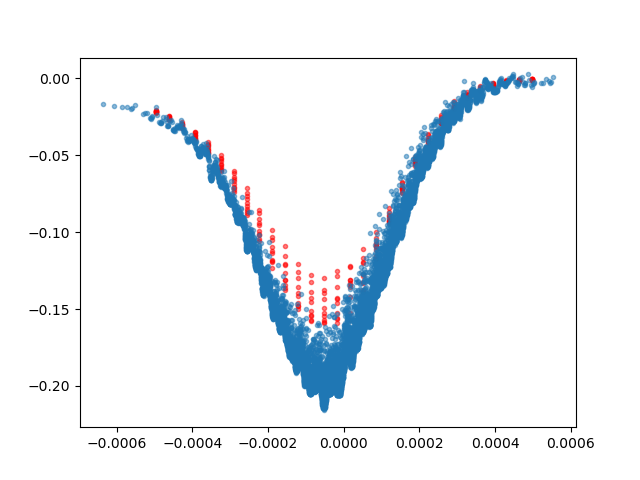

In [106]:
plt.figure()
plt.plot(z_grids, dE_dct, '.', alpha = 0.5, color = 'r')
plt.plot(z, fz/1e6, '.',alpha = 0.5)
plt.show()

In [107]:
nx = 10
nz = 30
xlim = 3
zlim = 3


meanx = np.mean(x)
meanz = np.mean(z)
x -= meanx
z -= meanz
n = z.shape[0]
sig_x = np.std(x)
sig_z = np.std(z)

xrange = np.linspace(meanx-xlim*sig_x, meanx+xlim*sig_x, nx)
zrange = np.linspace(meanz-zlim*sig_z, meanz+zlim*sig_z, nz)
xmesh, ymesh = np.meshgrid(xrange, zrange, indexing = 'ij')
fz_count = histogram_cic_2d(q1 = x, q2 = z, w = fz/1e6,
                     nbins_1 = nx, bins_start_1 = meanx-xlim*sig_x, bins_end_1 = meanx + xlim*sig_x,
                     nbins_2 = nz, bins_start_2 = meanz-zlim*sig_z, bins_end_2 = meanz + zlim*sig_z)
density_count = histogram_cic_2d(q1 = x, q2 = z, w = np.ones(z.shape),
                     nbins_1 = nx, bins_start_1 = meanx-xlim*sig_x, bins_end_1 = meanx + xlim*sig_x,
                     nbins_2 = nz, bins_start_2 = meanz-zlim*sig_z, bins_end_2 = meanz+ zlim*sig_z)
fz_bin = fz_count/density_count
#plot_surface(xrange, zrange, fz_bin)

C:\Users\yingb\AppData\Local\Temp\ipykernel_2984\978577780.py:24: RuntimeWarning: invalid value encountered in divide
  fz_bin = fz_count/density_count


C:\Users\yingb\AppData\Local\Temp\ipykernel_2984\2735727288.py:27: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


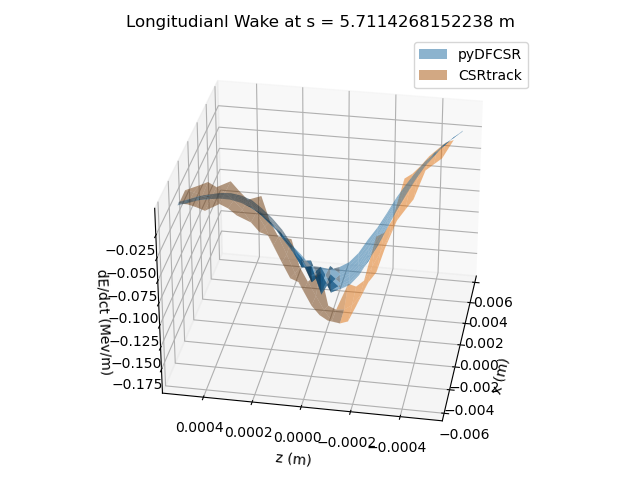

In [108]:
X, Y = x_grids, z_grids
Z = dE_dct

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X, Y, Z, color ='C0', alpha = 0.5, label = 'pyDFCSR')

surf1._edgecolors2d = surf1._edgecolor3d
surf1._facecolors2d = surf1._facecolor3d
 
ax.set_title('3D Surface plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_ylim([-0.4e-5, 1e-5])
#ax.scatter(x, z, fz/1e6, color='red', s=2)
surf2 = ax.plot_surface(xmesh, ymesh, fz_bin, color ='C1', alpha = 0.5, label = 'CSRtrack')
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_zlabel('dE/dct (Mev/m)')
ax.set_title('Longitudianl Wake at s = {} m'.format(t))

surf2._edgecolors2d = surf2._edgecolor3d
surf2._facecolors2d = surf2._facecolor3d

ax.azim = 190
ax.dist = 10
ax.elev = 30

ax.legend()
plt.tight_layout()
plt.show()


C:\Users\yingb\AppData\Local\Temp\ipykernel_2984\4055751515.py:9: RuntimeWarning: invalid value encountered in divide
  fx_bin = fx_count/density_count
C:\Users\yingb\AppData\Local\Temp\ipykernel_2984\4055751515.py:32: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


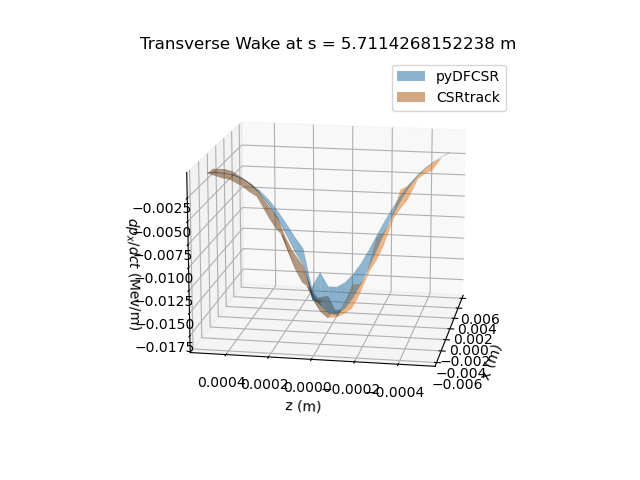

In [109]:
xrange = np.linspace(meanx-3*sig_x, meanx+3*sig_x, nx)
zrange = np.linspace(meanz-3*sig_z, meanz+3*sig_z, nz)
fx_count = histogram_cic_2d(q1 = x, q2 = z, w = fx/1e6,
                     nbins_1 = nx, bins_start_1 = meanx-3*sig_x, bins_end_1 = meanx + 3*sig_x,
                     nbins_2 = nz, bins_start_2 = meanz-3*sig_z, bins_end_2 = meanz + 3*sig_z)
density_count = histogram_cic_2d(q1 = x, q2 = z, w = np.ones(z.shape),
                     nbins_1 = nx, bins_start_1 = meanx-3*sig_x, bins_end_1 = meanx + 3*sig_x,
                     nbins_2 = nz, bins_start_2 = meanz-3*sig_z, bins_end_2 = meanz+ 3*sig_z)
fx_bin = fx_count/density_count

X, Y = x_grids, z_grids
Z = xkicks

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X, Y, Z, color ='C0', alpha = 0.5, label = 'pyDFCSR')

surf1._edgecolors2d = surf1._edgecolor3d
surf1._facecolors2d = surf1._facecolor3d
 
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_zlabel('$dp_x/dct$ (Mev/m)')
ax.set_title('Transverse Wake at s = {} m'.format(t))
#ax.scatter(x, z, fx/1e6, color='red', s=1)
surf2 = ax.plot_surface(xmesh, ymesh, fx_bin, color ='C1', alpha = 0.5, label = 'CSRtrack')

surf2._edgecolors2d = surf2._edgecolor3d
surf2._facecolors2d = surf2._facecolor3d

ax.azim = 190
ax.dist = 10
ax.elev = 15

ax.legend()

plt.show()

## Plot particles

Text(0, 0.5, 'z(m )')

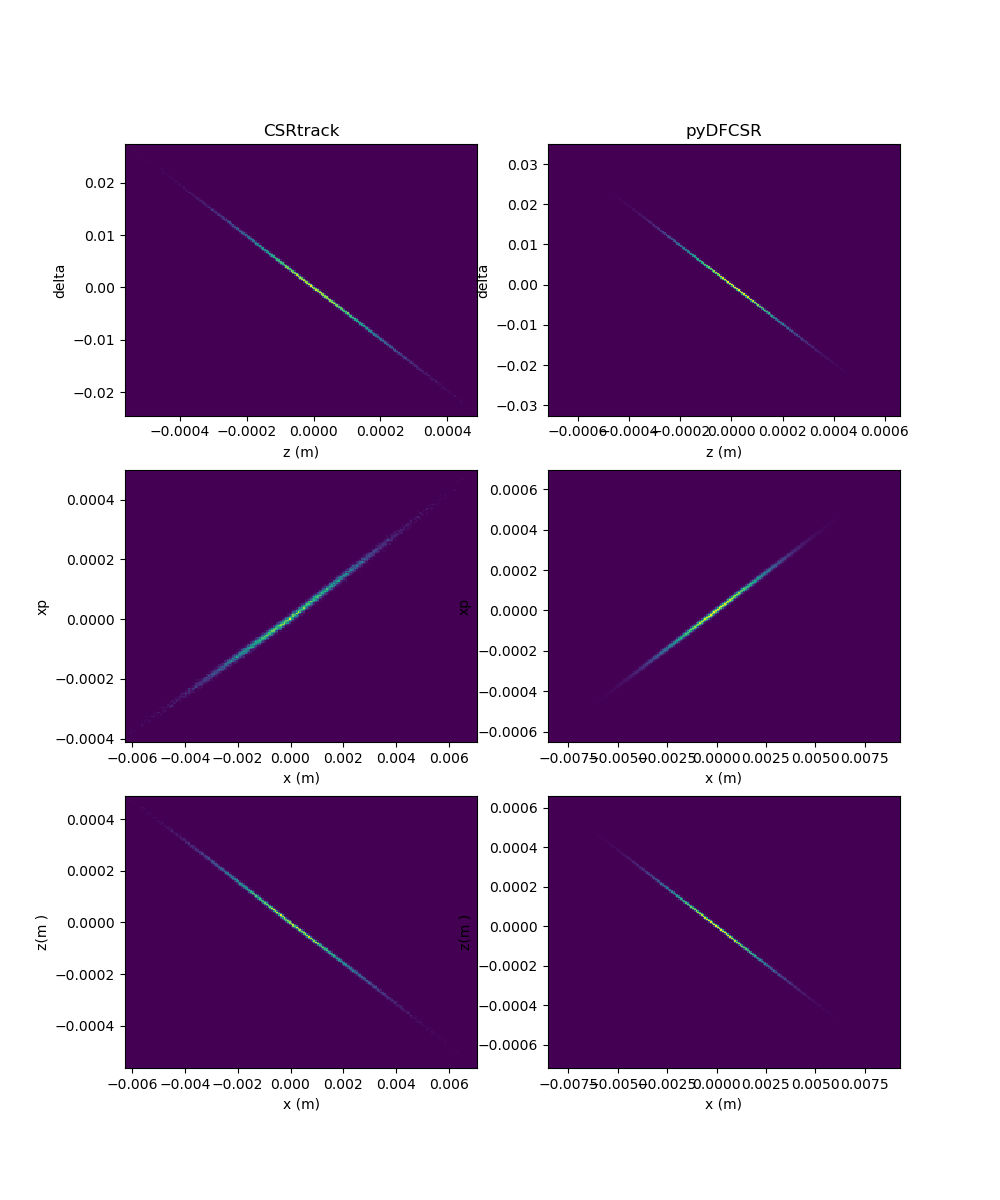

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (10, 12))
axes[0, 0].set_title('CSRtrack')
axes[0, 1].set_title('pyDFCSR')
ax1 = axes[0,0]
ax2 = axes[0,1]
surf = ax1.hist2d(z, delta, bins = 200)
surf2 = ax2.hist2d(z2, delta2, bins = 200)
ax1.set_xlabel('z (m)')
ax1.set_ylabel('delta')
ax2.set_xlabel('z (m)')
ax2.set_ylabel('delta')

ax1 = axes[1,0]
ax2 = axes[1,1]
surf = ax1.hist2d(x, xp, bins = 200)
surf2 = ax2.hist2d(x2, xp2, bins = 200)
ax1.set_xlabel('x (m)')
ax1.set_ylabel('xp')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('xp')

ax1 = axes[2,0]
ax2 = axes[2,1]
surf = ax1.hist2d(x, z, bins = 200)
surf2 = ax2.hist2d(x2, z2, bins = 200)
ax1.set_xlabel('x (m)')
ax1.set_ylabel('z(m )')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('z(m )')

## Plot Statistics

In [38]:
#slice emittance
def get_slice_emittance(z, x, xp, nbins = 100):
    zmean = np.mean(z)
    sigma_z = np.std(z)
    zrange = np.linspace(zmean - 3*sigma_z,zmean + 3*sigma_z, nbins + 1)
    emitX = np.zeros((nbins,))
    for k in range(nbins):
        zmin = zrange[k]
        zmax = zrange[k + 1]
        ind = (z>=zmin) &(z < zmax)
        x_slice = x[ind]
        xp_slice = xp[ind]
        
        emitX_slice = np.sqrt(np.mean(x_slice**2)*np.mean(xp_slice**2) - np.mean(x_slice*xp_slice)**2)
        emitX[k] = emitX_slice
    
    zpos = (zrange[:-1] + zrange[1:])/2
    return zpos, emitX
        

In [39]:
zpos1, emitX1 = get_slice_emittance(z, x, xp, nbins = 50)
zpos2, emitX2 = get_slice_emittance(z2, x2, xp2, nbins = 50)

Text(0, 0.5, 'emitX (m)')

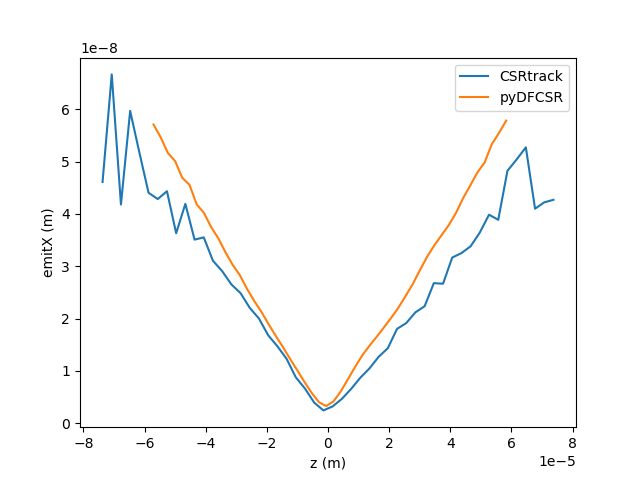

In [40]:
plt.figure()
plt.plot(zpos1, emitX1, label = 'CSRtrack')
plt.plot(zpos2, emitX2, label = 'pyDFCSR')
plt.legend()
plt.xlabel('z (m)')
plt.ylabel('emitX (m)')

## load all CSRtrack files

In [43]:
N = 123
CSRtrack_stats = {'t': np.zeros((N,)), 'sigma_x': np.zeros((N,)), 'sigma_z': np.zeros((N,)), 
                  'emitX': np.zeros((N,)), 'norm_emitX': np.zeros((N,)),
                  'betaX': np.zeros((N,)), 'alphaX': np.zeros((N,))}
for k in range(N):
    filename = 'chicane_{:04d}.fmt3'.format(k + 1)
    data = np.loadtxt(datafolder_CSRtrack + '/' + filename)
    z = data[1:, 4]
    delta = data[1:, 5]

    x = data[1:, 0]
    xp = data[1:, 1]

    t = data[0,0]
    gam0 = data[0,1]

    print("Loading at z=", t)


    sigma_x = np.std(x)
    sigma_z = np.std(z)
    emitX = np.sqrt(np.mean(x**2)*np.mean(xp**2) - np.mean(x*xp)**2)
    norm_emitX = gam0*emitX
    betaX = sigma_x**2/emitX
    alphaX = -np.mean(x*xp)/emitX
    
    CSRtrack_stats['t'][k] = t
    CSRtrack_stats['sigma_x'][k] = sigma_x
    CSRtrack_stats['sigma_z'][k] = sigma_z
    CSRtrack_stats['emitX'][k] = emitX
    CSRtrack_stats['norm_emitX'][k] = norm_emitX
    CSRtrack_stats['betaX'][k] = betaX
    CSRtrack_stats['alphaX'][k] = alphaX
    
    


Loading at z= 0.0
Loading at z= 0.20546107952329
Loading at z= 0.31264382133692
Loading at z= 0.41982656315054
Loading at z= 0.50109139650487
Loading at z= 0.60073601317501
Loading at z= 0.71034509151215
Loading at z= 0.8199541698493
Loading at z= 0.92956324818645
Loading at z= 1.0391723265236
Loading at z= 1.1487814048607
Loading at z= 1.2583904831979
Loading at z= 1.367999561535
Loading at z= 1.4776086398722
Loading at z= 1.5872177182093
Loading at z= 1.6968267965465
Loading at z= 1.8064358748836
Loading at z= 1.9160449532208
Loading at z= 2.0256540315579
Loading at z= 2.1352631098951
Loading at z= 2.2448721882322
Loading at z= 2.3544812665694
Loading at z= 2.4640903449065
Loading at z= 2.5736994232436
Loading at z= 2.6833085015808
Loading at z= 2.7929175799179
Loading at z= 2.9025266582551
Loading at z= 3.0121357365922
Loading at z= 3.1217448149294
Loading at z= 3.2313538932665
Loading at z= 3.3409629716037
Loading at z= 3.4505720499408
Loading at z= 3.560181128278
Loading at z= 3.6

t2 = np.array(f['step_positions'])
    alphaX2 = np.array(f['alphaX_beam'])
    betaX2 = np.array(f['betaX_beam'])
    gemitX2 = np.array(f['gemitX'])
    sigmaX2 = np.array(f['sigX'])
    sigmaZ2 = np.array(f['sigZ'])

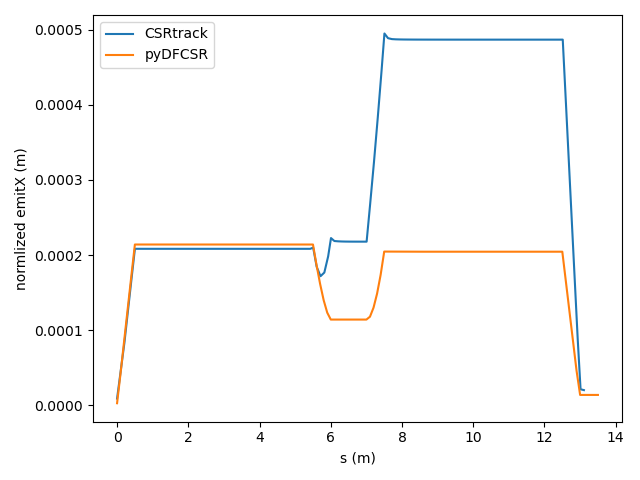

In [45]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['norm_emitX'],label = 'CSRtrack')
plt.plot(t2 , gemitX2, label = 'pyDFCSR')
plt.ylabel('normlized emitX (m)')
plt.legend()
plt.xlabel('s (m)')
plt.tight_layout()
plt.show()

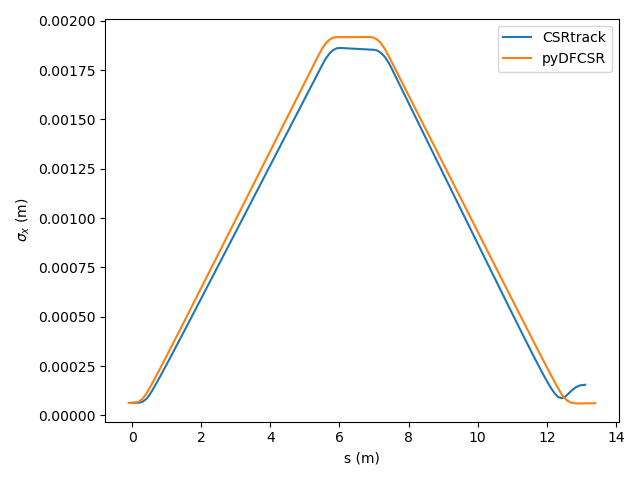

In [46]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['sigma_x'], label = 'CSRtrack')
plt.plot(t2 - 0.1, sigmaX2, label = 'pyDFCSR')
plt.xlabel('s (m)')
plt.ylabel('$\sigma_x$ (m)')
plt.tight_layout()
plt.legend()
plt.show()

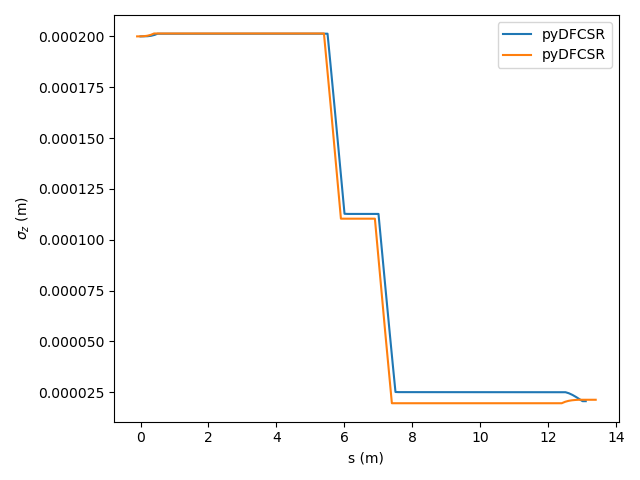

In [47]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['sigma_z'], label = 'pyDFCSR')
plt.plot(t2 - 0.1, sigmaZ2,label = 'pyDFCSR')
plt.xlabel('s (m)')
plt.ylabel('$\sigma_z$ (m)')
plt.tight_layout()
plt.legend()
plt.show()

C:\Users\yingb\AppData\Local\Temp\ipykernel_2984\2831870915.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


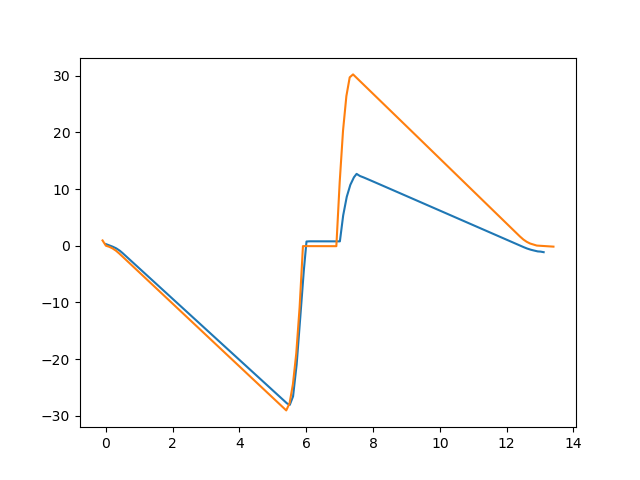

In [48]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['alphaX'])
plt.plot(t2 - 0.1, alphaX2)
plt.show()

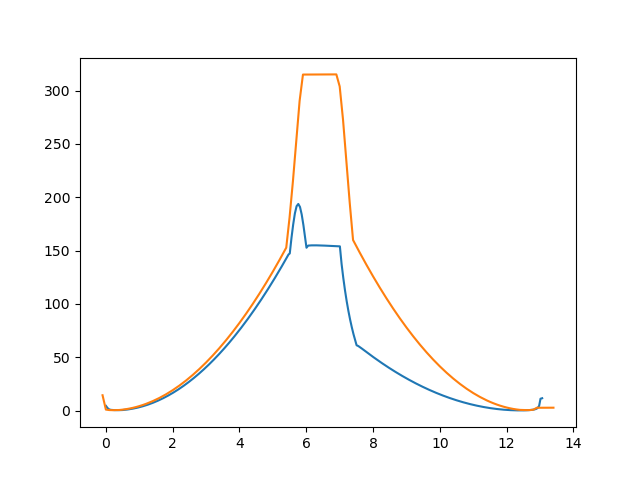

In [20]:
plt.figure()
plt.plot(CSRtrack_stats['t'], CSRtrack_stats['betaX'])
plt.plot(t2 - 0.1, betaX2)
plt.show()